In [ ]:
import pandas as pd
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
import seaborn as sns
df = pd.read_csv("C:\Personal\Masters\Masters_work\Study\Y1_S1\HIT140\Assessment_2\HIT_140_Assessment_2_200925\HIT_140_assessment_2\Datasets/dataset2_cleaned_V3.csv")
df = df.drop(columns=['time'])

In [ ]:
df.head()
# df.info()
# df.describe()

,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,season_code
0,0,-0.5,20,4.000000,0.0,0,0.0
1,0,0.0,28,4.000000,0.0,0,0.0
2,0,0.5,25,4.000000,0.0,0,0.0
3,0,1.0,71,4.000000,0.0,0,0.0
4,0,1.5,44,3.753857,0.0,0,0.0


In [ ]:
''' 
the response variable (y) is 'bat_landing_number'
the explanatory variable (X) can be a variety of variables
lets discuss their varies categories:


Rat presence:
    rat_minutes
    rat_arrival_number

Time: 
    month
    season
    hours after sunset

Extra:
    food_availability

    '''

" \nthe response variable (y) is 'bat_landing_number'\nthe explanatory variable (X) can be a variety of variables\nlets discuss their varies categories:\n\n\nRat presence:\n    rat_minutes\n    rat_arrival_number\n\nTime: \n    month\n    season\n    hours after sunset\n\nExtra:\n    food_availability\n\n    "

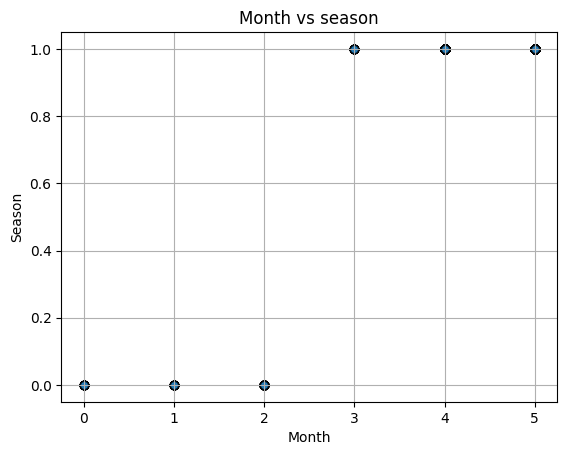

In [ ]:
# scatter plot

df5 = pd.read_csv("C:\Personal\Masters\Masters_work\Study\Y1_S1\HIT140\Assessment_2\HIT_140_Assessment_2_200925\HIT_140_assessment_2\Datasets/dataset1.csv")
plt.scatter(df5["month"], df5["season"], c="C0", alpha=0.8, edgecolor="k")
plt.xlabel("Month")
plt.ylabel("Season")
plt.title("Month vs season")
plt.grid(True)
plt.show()

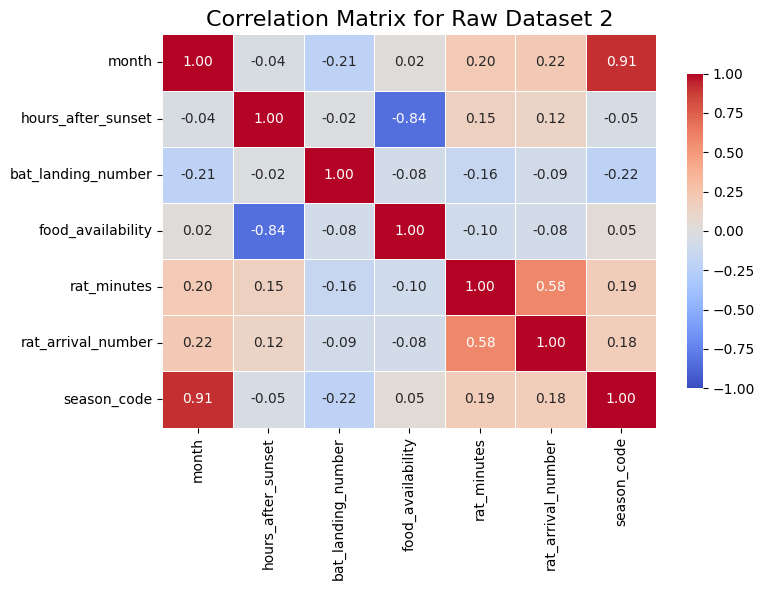

Intercept:  72.85083049042186
Coefficient:  [-1.23247295 -1.92434346 -8.35313374 -0.39837268  1.57782759 -7.41523798]
MLP performance:
MAE:  18.226876484653665
MSE:  518.5004864981921
RMSE:  22.770605756066132
RMSE (Normalised):  0.2210738422919042
R^2:  0.0808163482362606


In [ ]:
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix for Raw Dataset 2", fontsize=16)
plt.tight_layout()
plt.show()
df = df.dropna()
x = df.drop(columns=['bat_landing_number'])
y = df['bat_landing_number']             # e.g., y_col = 'y'

# # fit
# model = sm.OLS(y, X).fit()
# # summary
# print(model.summary())

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train)
# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)
# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)
# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test, y_pred))
# Normalised Root Mean Square Error
y_max = y.max()
y_min = y.min()
rmse_norm = rmse / (y_max - y_min)
# R-Squared
r_2 = metrics.r2_score(y_test, y_pred)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
# summary

In [ ]:
'''
There is a clear correlation between rat_minutes and rat_arrival_number (0.58)
Similarly, there is a correlation between month and season (0.91)
There also seems to be a correlation between food_availability and rat_minutes (-0.84)
Therefore is good remove these variables for the linear regression model

Colummns to be removed:
    rat_arrival_number
    month

'''

'\nThere is a clear correlation between rat_minutes and rat_arrival_number (0.58)\nSimilarly, there is a correlation between month and season (0.91)\nThere also seems to be a correlation between food_availability and rat_minutes (-0.84)\nTherefore is good remove these variables for the linear regression model\n\nColummns to be removed:\n    rat_arrival_number\n    month\n\n'

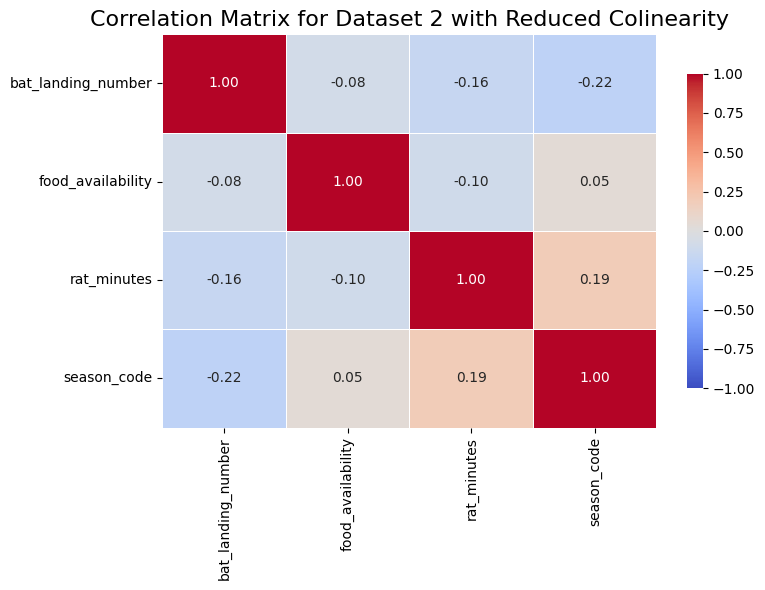

Intercept:  45.42235780418733
Coefficient:  [ -2.12805129  -0.35858791 -10.1841027 ]
MLP performance:
MAE:  18.33908710101085
MSE:  529.2180307279168
RMSE:  23.004739310149045
RMSE (Normalised):  0.22334698359368005
R^2:  0.061816575430739706


In [ ]:
df2 = df.drop(columns=['rat_arrival_number', 'month','hours_after_sunset'])
corr = df2.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix for Dataset 2 with Reduced Colinearity", fontsize=16)
plt.tight_layout()
plt.show()

# inputs
df2 = df2.dropna()

x2 = df2.drop(columns=['bat_landing_number'])       # e.g., X_cols = ['x1','x2','x3']
y2 = df2['bat_landing_number']             # e.g., y_col = 'y'
# add intercept
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.4, random_state=0)
# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train)
# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)
# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)
# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test, y_pred))
# Normalised Root Mean Square Error
y_max = y.max()
y_min = y.min()
rmse_norm = rmse / (y_max - y_min)
# R-Squared
r_2 = metrics.r2_score(y_test, y_pred)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)

# X = sm.add_constant(X)

# # fit
# model = sm.OLS(y, X).fit()
# # summary
# print(model.summary())



### splitting the dataset into separate seasons ###

In [ ]:
df_spr = df2[df2['season_code'] == 1]
df_win = df2[df2['season_code'] == 0]
df_spr = df_spr.drop(columns=['season_code'])
df_win = df_win.drop(columns=['season_code'])
df_spr = df_spr.dropna()
df_win = df_win.dropna()

In [ ]:
x_spr = df_spr.drop(columns=['bat_landing_number'])
y_spr = df_spr['bat_landing_number']             # e.g., y_col = 'y'
# # fit
model = sm.OLS(y_spr, x_spr).fit()
# # summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     bat_landing_number   R-squared (uncentered):                   0.559
Model:                            OLS   Adj. R-squared (uncentered):              0.558
Method:                 Least Squares   F-statistic:                              706.7
Date:                Mon, 13 Oct 2025   Prob (F-statistic):                   5.82e-199
Time:                        18:19:17   Log-Likelihood:                         -5151.3
No. Observations:                1117   AIC:                                  1.031e+04
Df Residuals:                    1115   BIC:                                  1.032e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [ ]:
x_win = df_win.drop(columns=['bat_landing_number'])
y_win = df_win['bat_landing_number']             # e.g., y_col = 'y'
# # fit
model = sm.OLS(y_win, x_win).fit()
# # summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     bat_landing_number   R-squared (uncentered):                   0.587
Model:                            OLS   Adj. R-squared (uncentered):              0.586
Method:                 Least Squares   F-statistic:                              544.5
Date:                Mon, 13 Oct 2025   Prob (F-statistic):                   7.66e-148
Time:                        18:19:19   Log-Likelihood:                         -3687.6
No. Observations:                 768   AIC:                                      7379.
Df Residuals:                     766   BIC:                                      7389.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------